In [2]:
import qiskit, qiskit_ibm_runtime, qiskit_aer
print(qiskit.__version__, qiskit_ibm_runtime.__version__, qiskit_aer.__version__)

2.1.2 0.41.1 0.17.1


In [3]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [4]:


service = QiskitRuntimeService()

cands = service.backends(simulator=False, operational=True, min_num_qubits=6)
for b in cands: print(b.name, b.num_qubits)

A = service.least_busy(simulator=False, operational=True, min_num_qubits=6)
B = next(b for b in cands if b.name != A.name)
A, B

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-09-01 20:43:49,705: Default instance not set. Searching all available instances.


ibm_torino 133
ibm_brisbane 127


(<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>)

In [5]:
cfgA = A.configuration(); cfgB = B.configuration()
print("A basis_gates:", cfgA.basis_gates)
print("B basis_gates:", cfgB.basis_gates)
cmapA = A.coupling_map; cmapB = B.coupling_map

A basis_gates: ['cz', 'id', 'rz', 'sx', 'x']
B basis_gates: ['ecr', 'id', 'rz', 'sx', 'x']


In [6]:
import graphviz
print(graphviz.version())


(13, 1, 2)


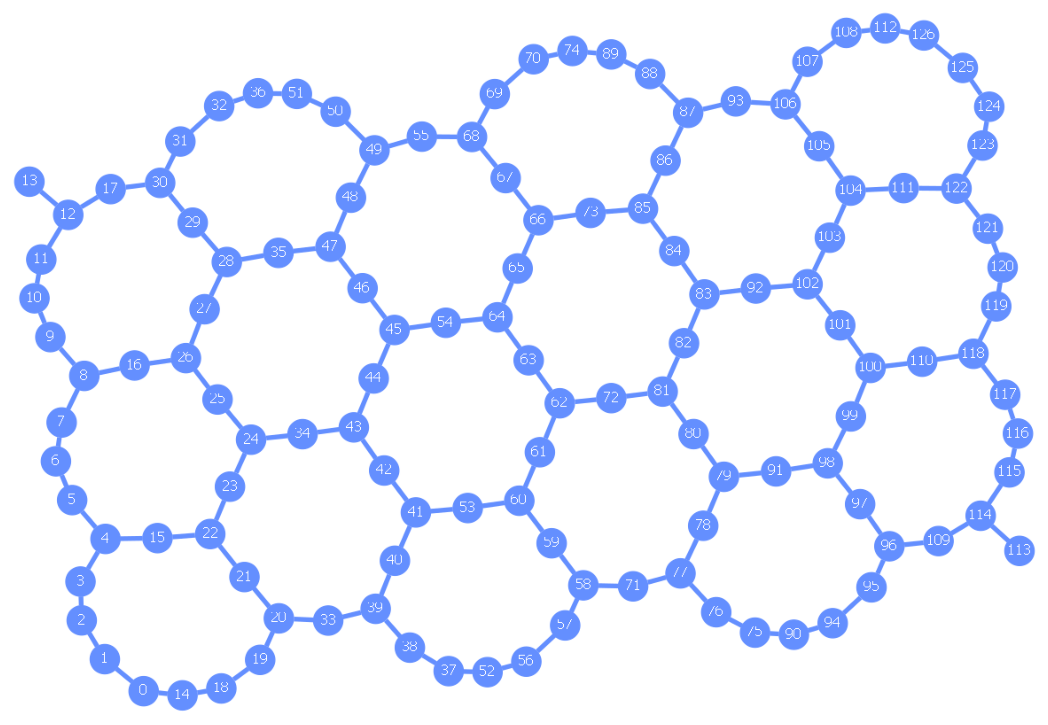

In [7]:
from qiskit.visualization import plot_coupling_map
plot_coupling_map(A.num_qubits, None, cmapA.get_edges())
plot_coupling_map(B.num_qubits, None, cmapB.get_edges())

In [ ]:
from qiskit import QuantumCircuit

# One‑bit QRNG
qc1 = QuantumCircuit(1)
qc1.h(0)          # coin‑flip on qubit 0
qc1.measure_all() # record the outcome as a classical bit
qc1.draw()

# k‑bit QRNG
def qrng(k: int):
    qc = QuantumCircuit(k)
    for q in range(k):
        qc.h(q)          # one coin‑flip per qubit
    qc.measure_all()
    return qc

k = 6
qc = qrng(k)
qc.draw()

┌───┐ ░ ┌─┐               
   q_0: ┤ H ├─░─┤M├───────────────
        ├───┤ ░ └╥┘┌─┐            
   q_1: ┤ H ├─░──╫─┤M├────────────
        ├───┤ ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├─░──╫──╫─┤M├─────────
        ├───┤ ░  ║  ║ └╥┘┌─┐      
   q_3: ┤ H ├─░──╫──╫──╫─┤M├──────
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐   
   q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐
   q_5: ┤ H ├─░──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║ └╥┘
meas: 6/═════════╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5